## Instalação da biblioteca transformers datasets do hugging face.

In [ ]:
# Transformers installation
!pip install datasets transformers==4.28.0
# To install from source instead of the last release, comment the command above and uncomment the following one.
# ! pip install git+https://github.com/huggingface/transformers.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [ ]:
pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 3.6 MB/s eta 0:00:00


## Carregamento e tokenização o dataset ag_news do hugging face.

In [ ]:
from datasets import load_dataset

dataset = load_dataset("ag_news")


Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

Visualização de um exemplo de texto do dataset

In [ ]:
dataset["train"][100]['text']

'Comets, Asteroids and Planets around a Nearby Star (SPACE.com) SPACE.com - A nearby star thought to harbor comets and asteroids now appears to be home to planets, too. The presumed worlds are smaller than Jupiter and could be as tiny as Pluto, new observations suggest.'

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})

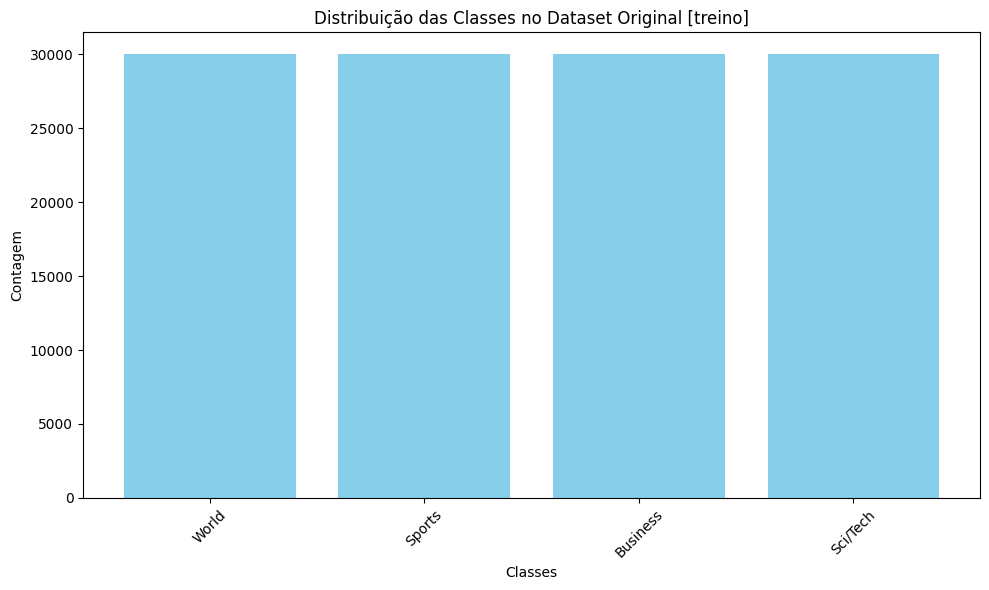

In [ ]:
len(dataset["train"]['label'])
worldLen = len([x for x in dataset["train"]['label'] if x == 0])
sportsLen = len([x for x in dataset["train"]['label'] if x == 1])
businessLen = len([x for x in dataset["train"]['label'] if x == 2])
techLen = len([x for x in dataset["train"]['label'] if x == 3])

import matplotlib.pyplot as plt

classes = ["World", "Sports", "Business", "Sci/Tech"]
contagens = [worldLen, sportsLen, businessLen, techLen]

# Cria um gráfico de barras
plt.figure(figsize=(10, 6))  # Define o tamanho do gráfico
plt.bar(classes, contagens, color='skyblue')  # Cria o gráfico de barras com as classes e contagens
plt.xlabel('Classes')  # Rótulo do eixo X
plt.ylabel('Contagem')  # Rótulo do eixo Y
plt.title('Distribuição das Classes no Dataset Original [treino]')  # Título do gráfico

# Mostra o gráfico
plt.xticks(rotation=45)  # Rotação dos rótulos das classes para melhor visualização
plt.tight_layout()  # Garante que os rótulos e barras não fiquem cortados
plt.show()



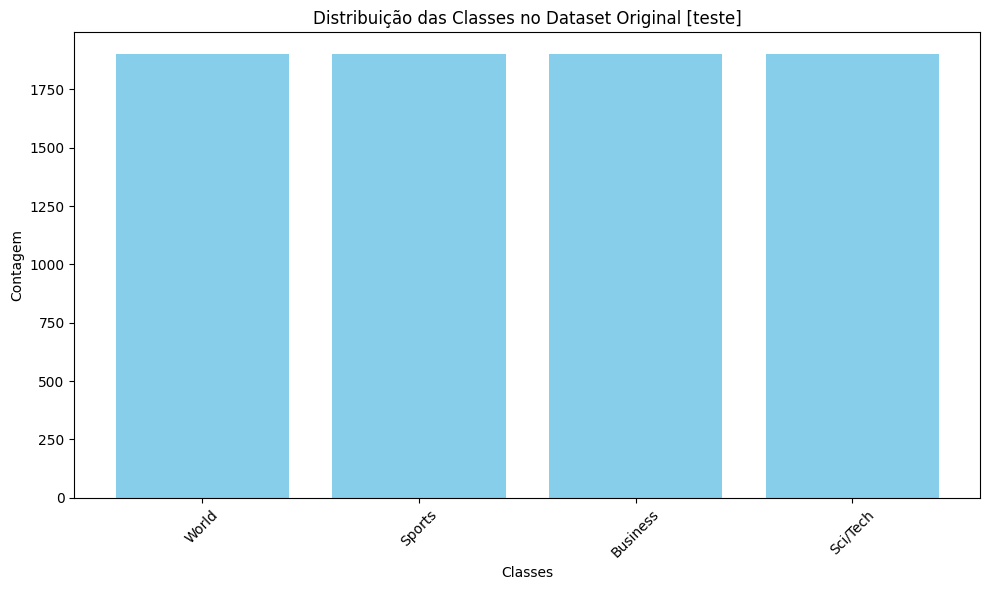

1900

In [ ]:
len(dataset["test"]['label'])
worldLen = len([x for x in dataset["test"]['label'] if x == 0])
sportsLen = len([x for x in dataset["test"]['label'] if x == 1])
businessLen = len([x for x in dataset["test"]['label'] if x == 2])
techLen = len([x for x in dataset["test"]['label'] if x == 3])

import matplotlib.pyplot as plt

classes = ["World", "Sports", "Business", "Sci/Tech"]
contagens = [worldLen, sportsLen, businessLen, techLen]

# Cria um gráfico de barras
plt.figure(figsize=(10, 6))  # Define o tamanho do gráfico
plt.bar(classes, contagens, color='skyblue')  # Cria o gráfico de barras com as classes e contagens
plt.xlabel('Classes')  # Rótulo do eixo X
plt.ylabel('Contagem')  # Rótulo do eixo Y
plt.title('Distribuição das Classes no Dataset Original [teste]')  # Título do gráfico

# Mostra o gráfico
plt.xticks(rotation=45)  # Rotação dos rótulos das classes para melhor visualização
plt.tight_layout()  # Garante que os rótulos e barras não fiquem cortados
plt.show()
techLen

Dividimos aqui o dataset em partições, separamos as palavras do texto de cada instância para que sejam elementos distintos.

O código a seguir tokeniza os exemplos de texto em um conjunto de dados usando o modelo BERT pré-treinado "bert-base-cased" e aplica preenchimento e truncamento, se necessário

In [ ]:
 from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")


def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

# Aplica a função tokenize_function para os textos de treino e de teste
tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/120000 [00:00<?, ? examples/s]

Map:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [ ]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 7600
    })
})

Criando uma porção menor do dataset.

In [ ]:
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(1000))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(1000))

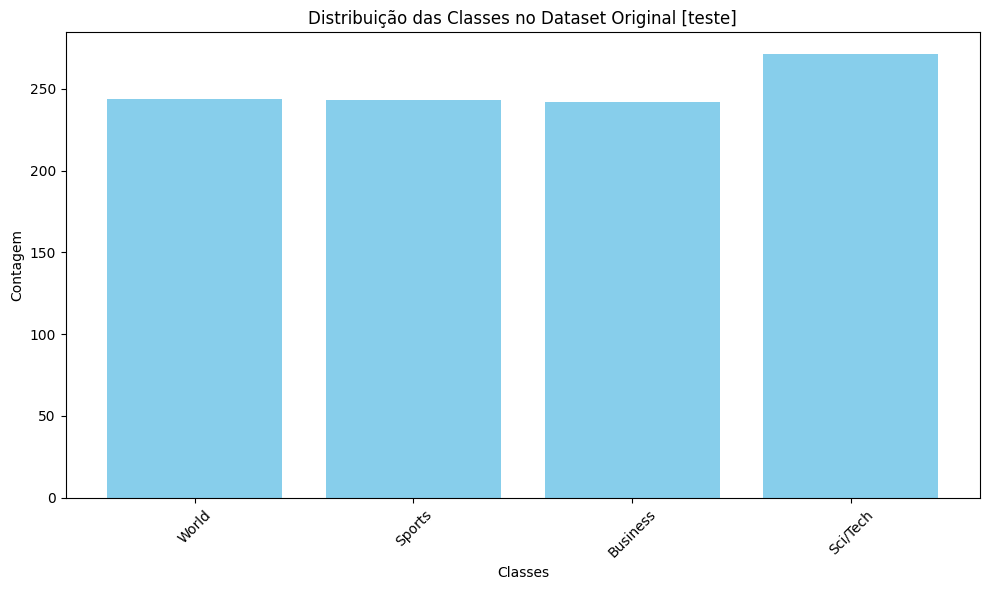

271

In [ ]:
len(small_train_dataset['label'])
worldLen = len([x for x in small_train_dataset['label'] if x == 0])
sportsLen = len([x for x in small_train_dataset['label'] if x == 1])
businessLen = len([x for x in small_train_dataset['label'] if x == 2])
techLen = len([x for x in small_train_dataset['label'] if x == 3])

import matplotlib.pyplot as plt

classes = ["World", "Sports", "Business", "Sci/Tech"]
contagens = [worldLen, sportsLen, businessLen, techLen]

# Cria um gráfico de barras
plt.figure(figsize=(10, 6))  # Define o tamanho do gráfico
plt.bar(classes, contagens, color='skyblue')  # Cria o gráfico de barras com as classes e contagens
plt.xlabel('Classes')  # Rótulo do eixo X
plt.ylabel('Contagem')  # Rótulo do eixo Y
plt.title('Distribuição das Classes no Dataset Original [teste]')  # Título do gráfico

# Mostra o gráfico
plt.xticks(rotation=45)  # Rotação dos rótulos das classes para melhor visualização
plt.tight_layout()  # Garante que os rótulos e barras não fiquem cortados
plt.show()
techLen

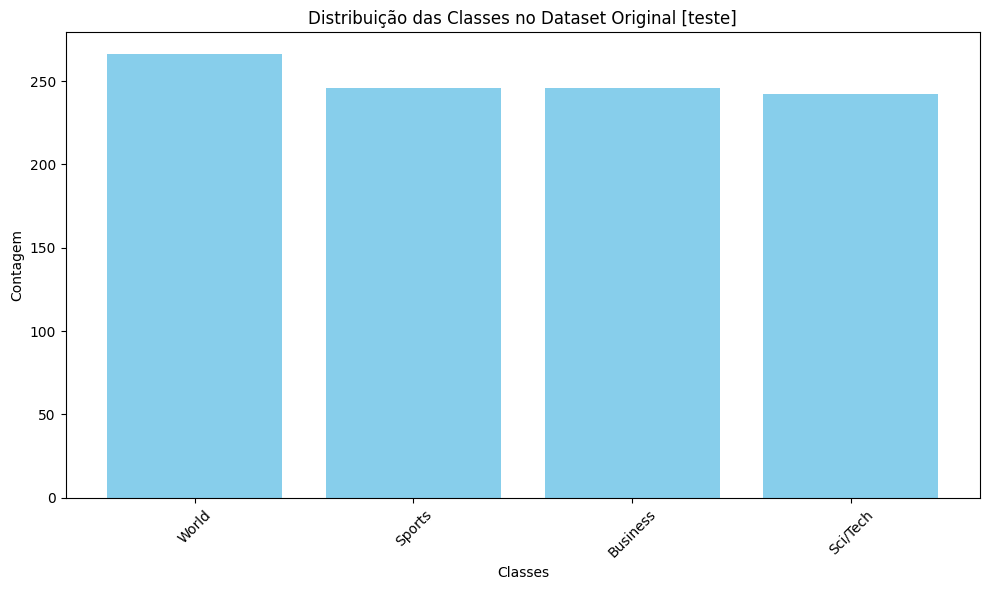

World: 266 Sports: 246 Business: 246 Sci/Tech: 242


In [ ]:
worldLen = len([x for x in small_eval_dataset['label'] if x == 0])
sportsLen = len([x for x in small_eval_dataset['label'] if x == 1])
businessLen = len([x for x in small_eval_dataset['label'] if x == 2])
techLen = len([x for x in small_eval_dataset['label'] if x == 3])

import matplotlib.pyplot as plt

classes = ["World", "Sports", "Business", "Sci/Tech"]
contagens = [worldLen, sportsLen, businessLen, techLen]

# Cria um gráfico de barras
plt.figure(figsize=(10, 6))  # Define o tamanho do gráfico
plt.bar(classes, contagens, color='skyblue')  # Cria o gráfico de barras com as classes e contagens
plt.xlabel('Classes')  # Rótulo do eixo X
plt.ylabel('Contagem')  # Rótulo do eixo Y
plt.title('Distribuição das Classes no Dataset Original [teste]')  # Título do gráfico

# Mostra o gráfico
plt.xticks(rotation=45)  # Rotação dos rótulos das classes para melhor visualização
plt.tight_layout()  # Garante que os rótulos e barras não fiquem cortados
plt.show()
print("World: "+ str(worldLen) +" Sports: "+ str(sportsLen) +" Business: "+ str(businessLen) +" Sci/Tech: "+ str(techLen))

Carregamento do modelo e especificação no número de labels.

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest", num_labels=4, ignore_mismatched_sizes=True)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([3, 768]) in the checkpo

In [ ]:
!pip install transformers[torch]

In [ ]:
pip install accelerate -U

A seguir, cria-se uma classe TrainingArguments que contém todos os hiperparâmetros que podem ser ajustados, bem como flags para ativar diferentes opções de treinamento.

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="/content/test_trainer", num_train_epochs=50)

### Evaluete

In [ ]:
!pip install evaluate

In [ ]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

Carregamento uma métrica de avaliação chamada "accuracy" (precisão) usando o módulo "evaluate".

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,1.285000
1000,0.561700
1500,0.122900
2000,0.051000
2500,0.027000
3000,0.006900
3500,0.000100
4000,0.000100
4500,0.004600
5000,0.004500


TrainOutput(global_step=6250, training_loss=0.16564057964608073, metrics={'train_runtime': 4637.1676, 'train_samples_per_second': 10.782, 'train_steps_per_second': 1.348, 'total_flos': 1.31557890048e+16, 'train_loss': 0.16564057964608073, 'epoch': 50.0})

In [ ]:
trainer.evaluate(small_eval_dataset)

{'eval_loss': 3.3696391582489014,
 'eval_accuracy': 0.657,
 'eval_runtime': 32.0127,
 'eval_samples_per_second': 31.238,
 'eval_steps_per_second': 3.905,
 'epoch': 50.0}

In [ ]:
PredictionOutput = trainer.predict(small_eval_dataset)

In [ ]:
PredictionOutput

PredictionOutput(predictions=array([[-3.813834 , -3.1210017, -1.665109 ,  8.755438 ],
       [-3.7369707, -2.548403 , -2.181163 ,  8.643082 ],
       [-3.3326762,  9.213013 , -3.2942147, -3.1853807],
       ...,
       [-2.6829474,  9.121855 , -3.0547094, -3.6740885],
       [ 9.56458  , -1.7939398, -2.7537231, -2.654385 ],
       [-4.33418  ,  0.6058404, -3.476025 ,  6.693801 ]], dtype=float32), label_ids=array([1, 2, 1, 2, 3, 0, 2, 2, 3, 2, 0, 1, 1, 0, 2, 3, 0, 1, 0, 3, 0, 3,
       1, 1, 0, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 0, 0, 2, 0, 1, 1, 0, 0, 3,
       0, 1, 2, 1, 2, 1, 3, 3, 3, 2, 1, 2, 0, 3, 2, 1, 2, 1, 0, 2, 1, 3,
       3, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1, 3, 3, 2, 0, 1, 1, 0, 1, 3, 1, 2,
       0, 2, 1, 2, 2, 1, 2, 2, 2, 3, 2, 2, 0, 0, 2, 3, 2, 1, 3, 3, 2, 3,
       0, 1, 0, 2, 3, 1, 1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 3, 1, 2, 2, 0, 0,
       3, 3, 2, 0, 2, 1, 3, 2, 0, 1, 1, 0, 0, 3, 1, 1, 0, 2, 3, 3, 3, 1,
       2, 1, 1, 0, 0, 1, 1, 1, 3, 2, 3, 3, 1, 2, 0, 0, 3, 1, 2, 0, 3, 2,
      

## Acurácia, precisão e matriz de confusão

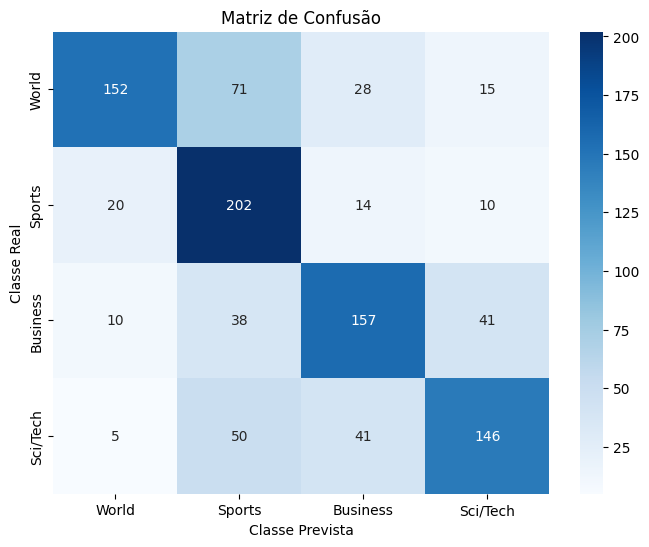

Acurácia: 0.66
Precisão: 0.68


In [ ]:
# Função para plotar a matriz de confusão
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Classe Prevista')
    plt.ylabel('Classe Real')
    plt.title('Matriz de Confusão')
    plt.show()

# Calcula as previsões do modelo no conjunto de teste
predictions = trainer.predict(small_eval_dataset)

# Obtém as previsões e rótulos verdadeiros
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels = small_eval_dataset["label"]

# Calcula a acurácia e a precisão
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')

# Calcula a matriz de confusão
cm = confusion_matrix(true_labels, predicted_labels)

# Plota a matriz de confusão
class_names = ["World", "Sports", "Business", "Sci/Tech"]
plot_confusion_matrix(cm, class_names)

# Exibe a acurácia e a precisão
print("Acurácia: {:.2f}".format(accuracy))
print("Precisão: {:.2f}".format(precision))
